In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from tensorflow import keras

In [2]:
print("tf version", tf.__version__)

tf version 2.15.0


In [3]:
os.getcwd()

'/content'

In [4]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
dev_list = ['GPU', 'CPU']
for device in dev_list:
  out = tf.config.list_physical_devices(device)
  if len(out) > 0:
    print(f"{device} : {out} is available")
  else:
    print(f"{device} : {out} is not available")

GPU : [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')] is available
CPU : [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')] is available


In [7]:
mnist = tf.keras.datasets.mnist

In [8]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [9]:
xtrain.shape

(60000, 28, 28)

In [11]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [12]:
# creating a  valivdation data
# scaling the images btw o to 1 by dividing it by 255, becasue th4e range of images is from 0 to 255
xvalid, xtrain = xtrain[:5000]/255.0, xtrain[5000:]/255.0
yvalid, ytrain = ytrain[:5000], ytrain[5000:]

#scale the test data
xtest = xtest/255.0

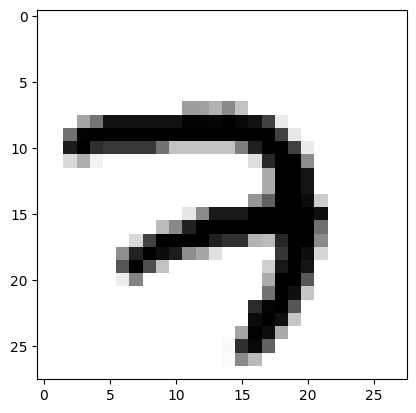

In [14]:
plt.imshow(xtrain[0], cmap='binary')
plt.show()

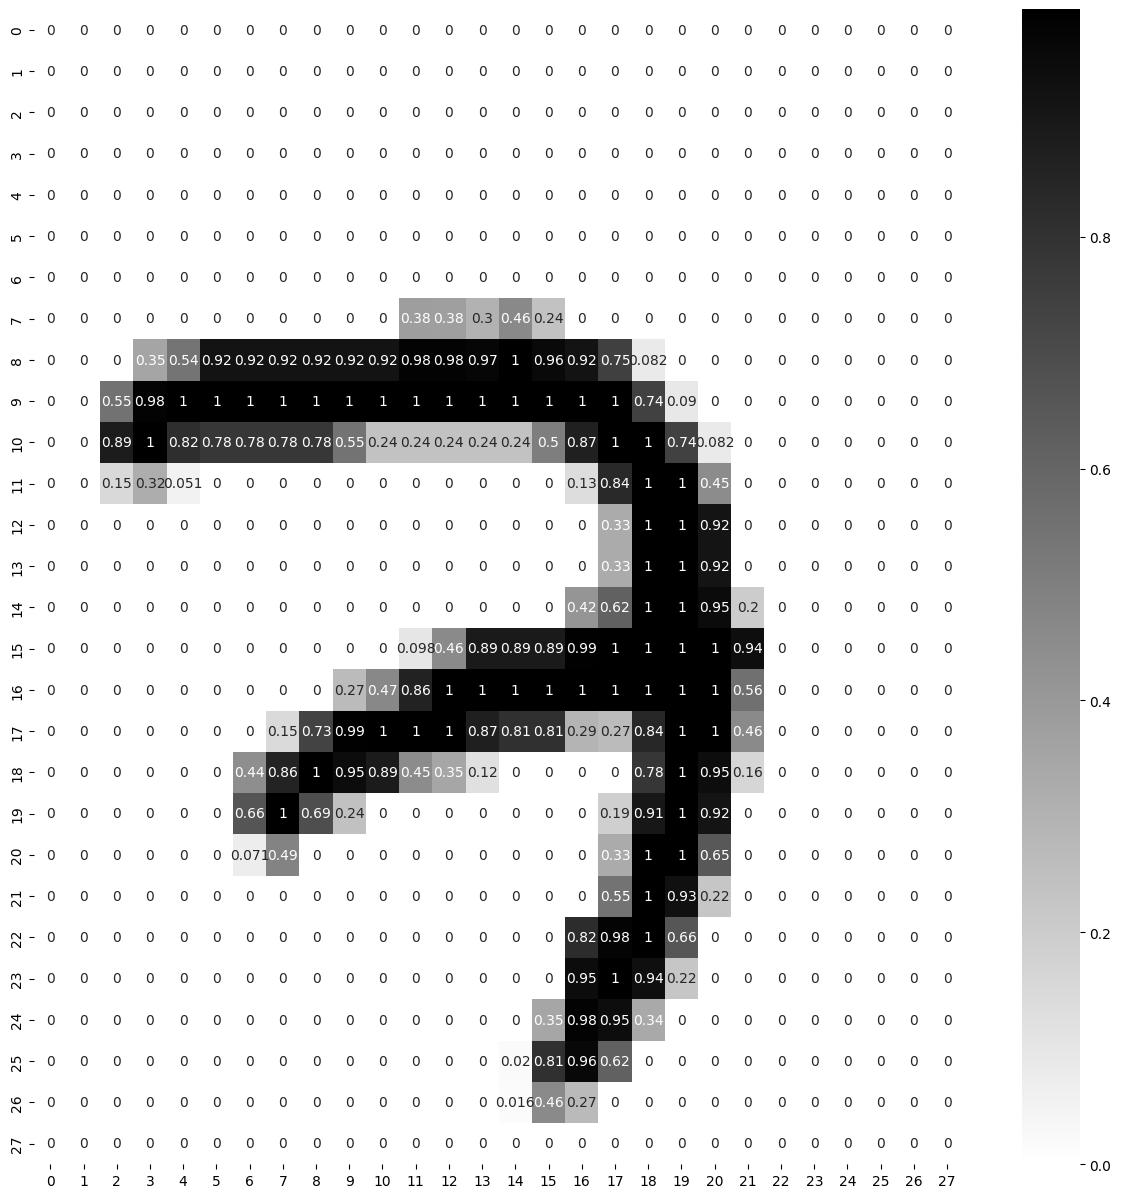

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(xtrain[0], annot=True, cmap='binary')
plt.show()

In [17]:
# Input size = 28*28
28*28 #input layer

784

In [19]:
#hidder layer 300, 100
#Output layer 10
layers = [
    tf.keras.layers.Flatten(input_shape=[28,28], name='inputlayer'),
    tf.keras.layers.Dense(300, activation='relu', name='hiddenlayer1'),
    tf.keras.layers.Dense(100, activation='relu', name='hiddenlayer2'),
    tf.keras.layers.Dense(10, activation='softmax', name='outputlayer')
]

model = tf.keras.models.Sequential(layers)

In [20]:
model.layers

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
# Neurons*weights + biases for each neuron
 (784*300)+300

235500

In [24]:
loss_function = 'sparse_categorical_crossentropy'
optimizer = 'SGD'
metrics = ['accuracy']

model.compile(loss=loss_function, optimizer=optimizer, metrics=metrics)

In [25]:
epochs=30
validation_set = (xvalid, yvalid)
history = model.fit(xtrain, ytrain, epochs=epochs, validation_data=validation_set, batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6069 - accuracy: 0.8451 - val_loss: 0.3028 - val_accuracy: 0.9158
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2870 - accuracy: 0.9173 - val_loss: 0.2379 - val_accuracy: 0.9348
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2351 - accuracy: 0.9334 - val_loss: 0.1988 - val_accuracy: 0.9446
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1999 - accuracy: 0.9425 - val_loss: 0.1744 - val_accuracy: 0.9512
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1733 - accuracy: 0.9506 - val_loss: 0.1572 - val_accuracy: 0.9574
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1528 - accuracy: 0.9559 - val_loss: 0.1438 - val_accuracy: 0.9608
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1368 - accuracy: 0.9609 - val_loss: 0.1294 - val_accuracy:

In [26]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [27]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.606857,0.845145,0.302830,0.9158
1,0.286992,0.917291,0.237949,0.9348
2,0.235086,0.933436,0.198782,0.9446
3,0.199869,0.942527,0.174412,0.9512
4,0.173299,0.950582,0.157231,0.9574
5,0.152759,0.955855,0.143778,0.9608
6,0.136787,0.960873,0.129438,0.9634
7,0.123448,0.964364,0.121329,0.9666
8,0.112123,0.967309,0.115794,0.9682
9,0.102529,0.970418,0.107556,0.9688


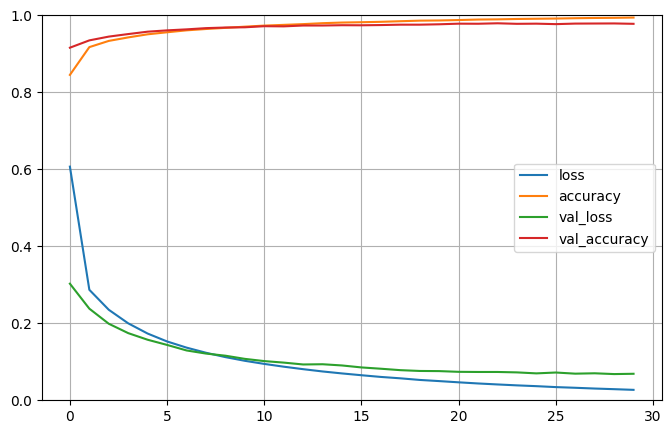

In [28]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [29]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 3ms/step - loss: 0.0720 - accuracy: 0.9779


[0.07199645042419434, 0.9779000282287598]

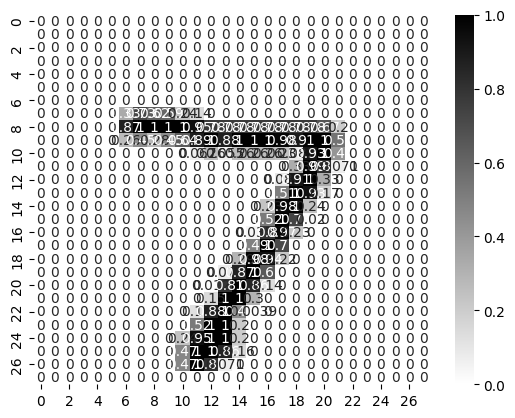

In [30]:
xnew = xtest[0]
sns.heatmap(xnew, annot=True, cmap='binary')
plt.show()

In [31]:
ynew=ytest[0]
ynew

7

In [35]:
pred = model.predict(xnew.reshape(1,28,28))
pred.round(3)

1/1 [==============================] - 0s 17ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [39]:
def get_digit_with_max_probability(pred):
  max_probability = 0
  digit_with_max_probability = None

  for i in range(len(pred[0])):
    if pred[0][i] > max_probability:
      max_probability = pred[0][i]
      digit_with_max_probability = i
  print(f"The digit with the maximum probability is: {digit_with_max_probability}")

In [40]:
pred = model.predict(xnew.reshape(1,28,28))
get_digit_with_max_probability(pred)

1/1 [==============================] - 0s 32ms/step
The digit with the maximum probability is: 7


# Let's test model with unseen data!

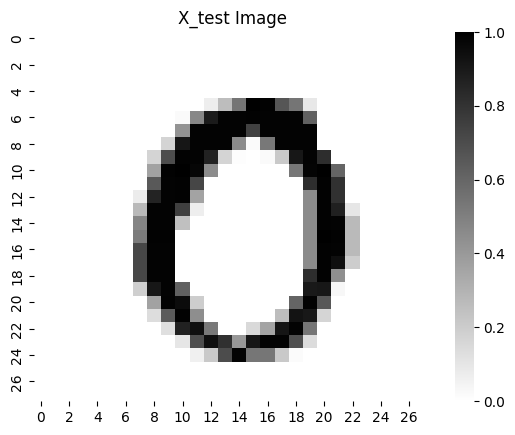

In [53]:
xnew = xtest[13]
sns.heatmap(xnew, annot=False, cmap='binary')
plt.title('X_test Image')
plt.show()

In [54]:
print(f"the actual value of digit is {ytest[13]}")

the actual value of digit is 0


In [55]:
prediction = model.predict(xnew.reshape(1,28,28))
get_digit_with_max_probability(prediction)

1/1 [==============================] - 0s 34ms/step
The digit with the maximum probability is: 0
